In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, train_test_split
from sklearn import metrics

In [2]:
data = pd.read_csv('../input/graduate-admissions/Admission_Predict_Ver1.1.csv')

In [3]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [5]:
data.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [6]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='GRE Score'>

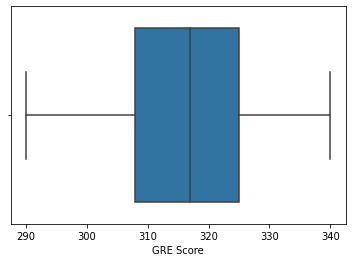

In [7]:
sns.boxplot(data['GRE Score'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='TOEFL Score'>

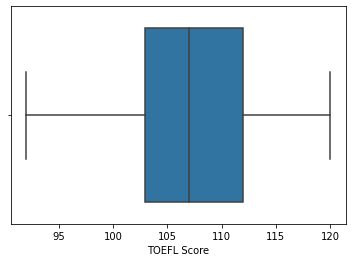

In [8]:
sns.boxplot(data['TOEFL Score'])

<AxesSubplot:xlabel='University Rating', ylabel='count'>

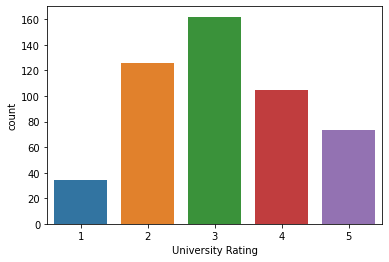

In [9]:
sns.countplot(x='University Rating', data = data)

<AxesSubplot:xlabel='SOP', ylabel='count'>

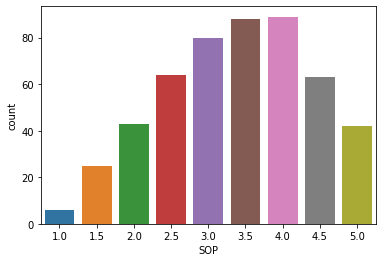

In [10]:
sns.countplot(x='SOP', data = data)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='CGPA'>

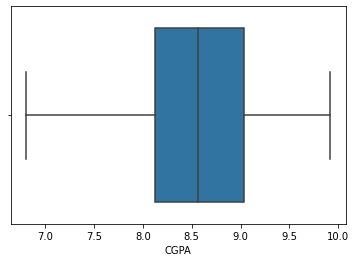

In [11]:
sns.boxplot(data['CGPA'])

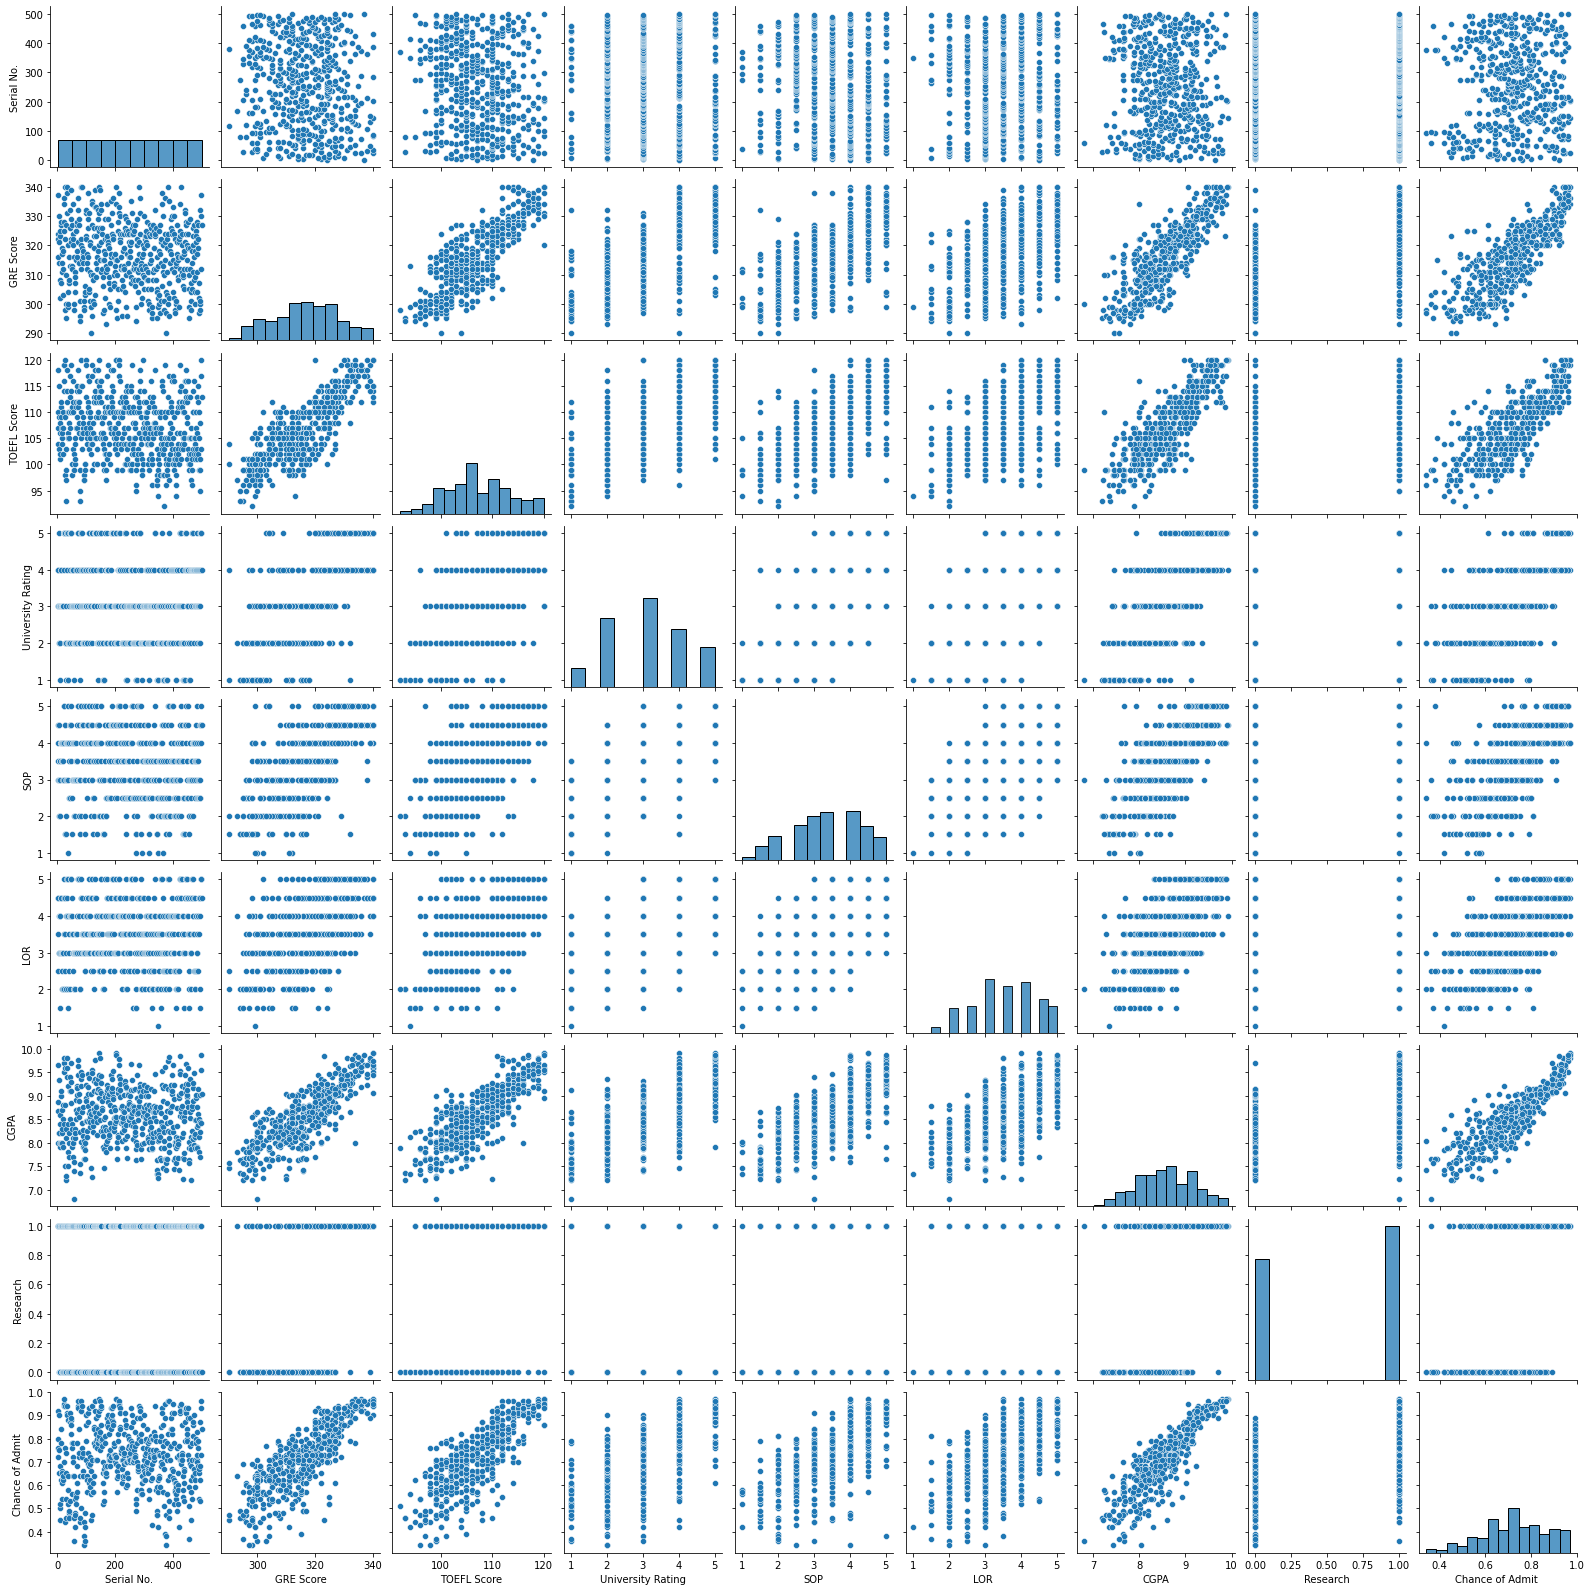

In [12]:
sns.pairplot(data)

<AxesSubplot:xlabel='Research', ylabel='count'>

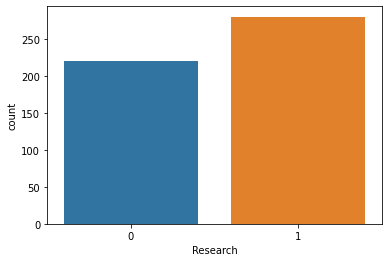

In [13]:
sns.countplot(x='Research', data = data)

In [14]:
data.corrwith(data['Chance of Admit '])

Serial No.           0.008505
GRE Score            0.810351
TOEFL Score          0.792228
University Rating    0.690132
SOP                  0.684137
LOR                  0.645365
CGPA                 0.882413
Research             0.545871
Chance of Admit      1.000000
dtype: float64

<AxesSubplot:xlabel='CGPA', ylabel='GRE Score'>

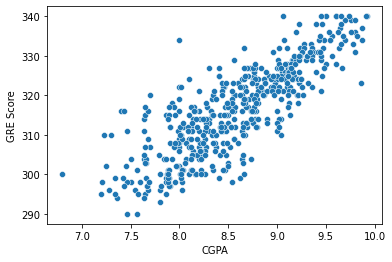

In [15]:
sns.scatterplot(data=data, x="CGPA", y="GRE Score")

<AxesSubplot:xlabel='CGPA', ylabel='TOEFL Score'>

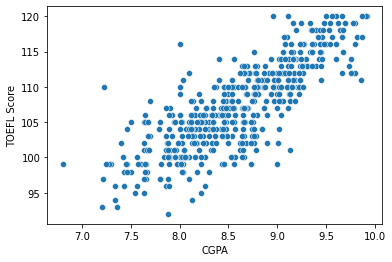

In [16]:
sns.scatterplot(data=data, x="CGPA", y="TOEFL Score")

<AxesSubplot:xlabel='CGPA', ylabel='Chance of Admit '>

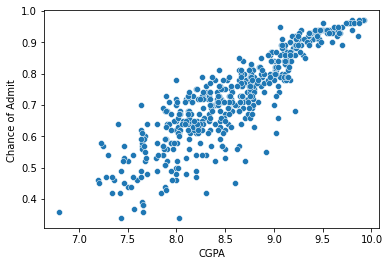

In [17]:
sns.scatterplot(data=data, x="CGPA", y="Chance of Admit ")

<AxesSubplot:xlabel='University Rating', ylabel='Chance of Admit '>

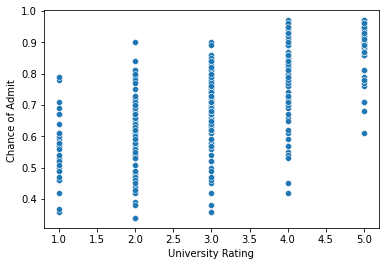

In [18]:
sns.scatterplot(data=data, x="University Rating", y="Chance of Admit ")

<AxesSubplot:xlabel='SOP', ylabel='Chance of Admit '>

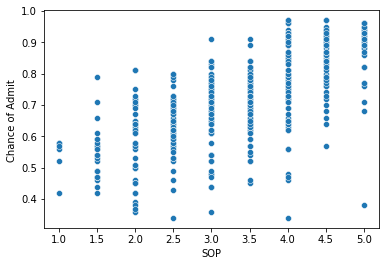

In [19]:
sns.scatterplot(data=data, x="SOP", y="Chance of Admit ")

In [20]:
X = data.drop(['Serial No.','Research','Chance of Admit '],axis = 1) 

In [21]:
Y = data['Chance of Admit ']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [23]:
model = LinearRegression()

In [24]:
model.fit(X_train, y_train)

LinearRegression()

In [25]:
print("The estimated intercept coeeficient is %.2f" %model.intercept_)

print("The number of coefficient used  %d" %len(model.coef_))

The estimated intercept coeeficient is -1.56
The number of coefficient used  6


In [26]:
#Dataframe for features and estimated coefficients

coeff_df = pd.DataFrame(X.columns)

coeff_df.columns = ['Features']

coeff_df['Coefficient Estimate'] = pd.Series(model.coef_)

coeff_df

,Features,Coefficient Estimate
0,GRE Score,0.002752
1,TOEFL Score,0.003312
2,University Rating,0.004141
3,SOP,0.001363
4,LOR,0.015755
5,CGPA,0.115428


In [27]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(350, 6) (150, 6) (350,) (150,)


In [28]:
y_pred = model.predict(X_test)

In [29]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
361,0.93,0.916908
73,0.84,0.786217
374,0.39,0.583265
155,0.77,0.721685
104,0.74,0.812384
...,...,...
266,0.72,0.667351
23,0.95,0.966572
222,0.76,0.801440
261,0.71,0.652303


In [30]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Root Squared Error:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.04328134441103433
Mean Squared Error: 0.0037981367000281927
Root Mean Squared Error: 0.06162902481808545
Root Squared Error: 0.8177657921019665
